# To analyze monthly device insurance attach percentage across stores, branches, and months, identify key trends and insights, and predict attach percentage for January at store level to support business decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv("Jumbo & company.csv")

In [3]:
df.shape

(163, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      163 non-null    object
 1   Store_Name  163 non-null    object
 2   Dec         163 non-null    object
 3   Nov         163 non-null    object
 4   Oct         163 non-null    object
 5   Sep         163 non-null    object
 6   Aug         163 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB


In [5]:
pd.isnull(df).sum()

Branch        0
Store_Name    0
Dec           0
Nov           0
Oct           0
Sep           0
Aug           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.columns

Index(['Branch', 'Store_Name', 'Dec', 'Nov', 'Oct', 'Sep', 'Aug'], dtype='object')

In [8]:
df.describe()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
count,163,163,163,163,163,163,163
unique,6,163,50,47,44,38,41
top,Delhi_Ncr,Delhi(Janakpuri) Br,0%,31%,17%,0%,0%
freq,44,1,26,9,11,31,26


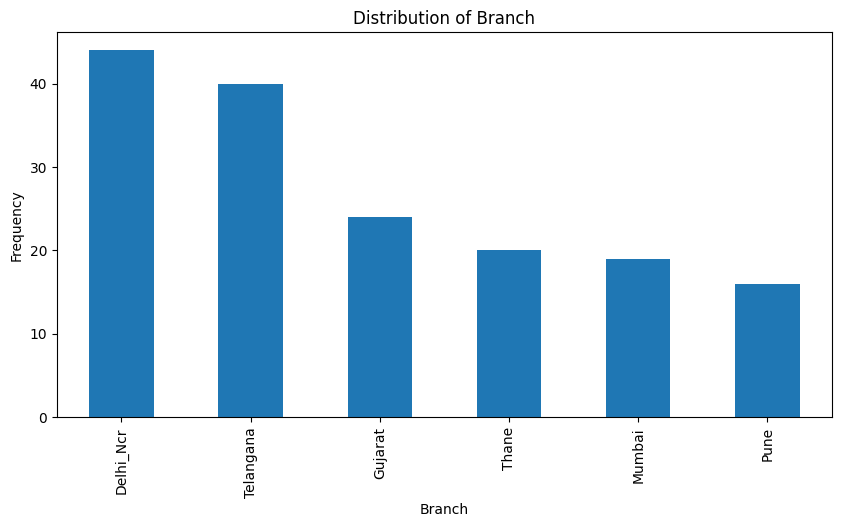

In [9]:
plt.figure(figsize=(10, 5))

df['Branch'].value_counts().plot(kind='bar')

plt.xlabel("Branch")
plt.ylabel("Frequency")
plt.title("Distribution of Branch")

plt.show()


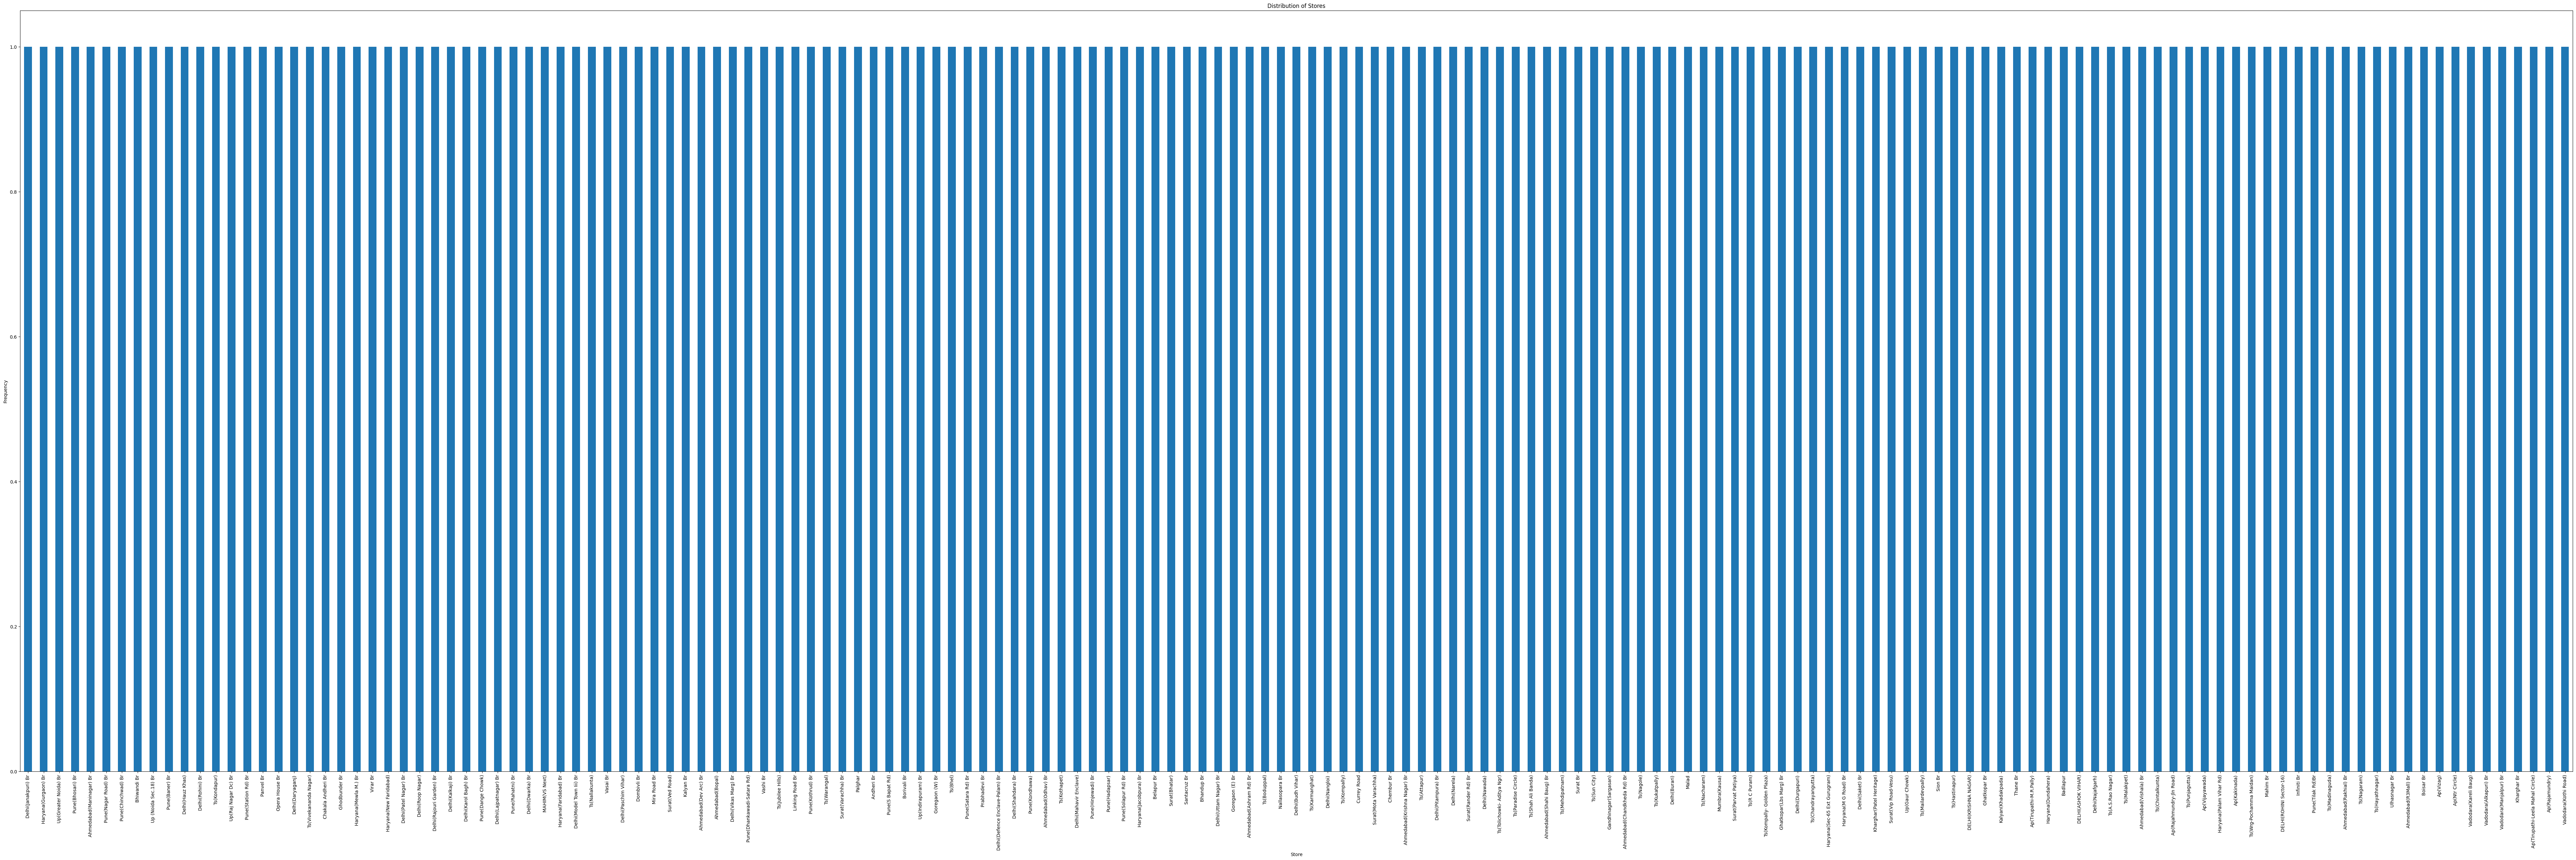

In [10]:
plt.figure(figsize=(100, 30))

df['Store_Name'].value_counts().plot(kind='bar')

plt.xlabel("Store")
plt.ylabel("Frequency")
plt.title("Distribution of Stores")

plt.show()


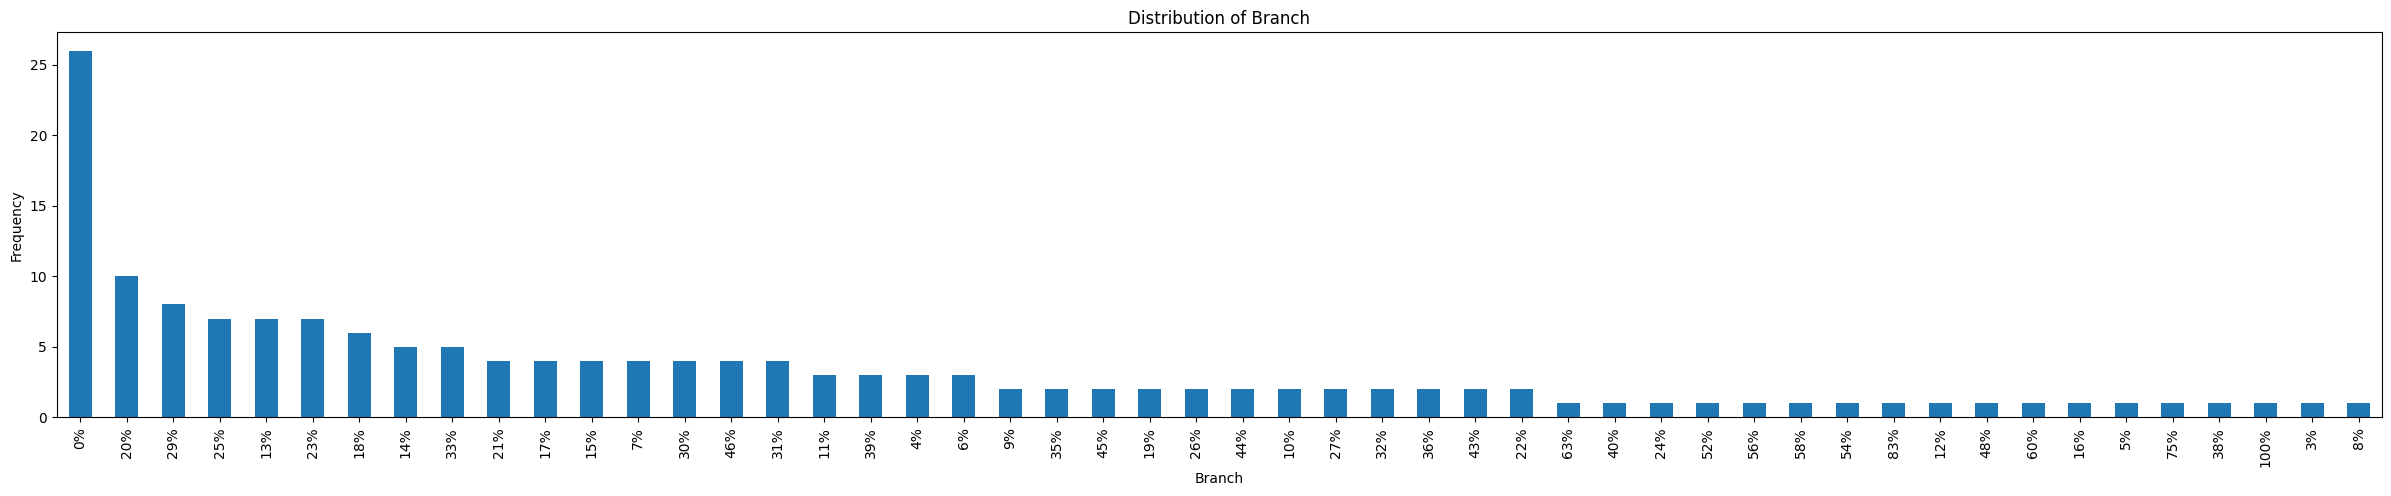

In [11]:
plt.figure(figsize=(30, 5))

df['Dec'].value_counts().plot(kind='bar')

plt.xlabel("Branch")
plt.ylabel("Frequency")
plt.title("Distribution of Branch")

plt.show()


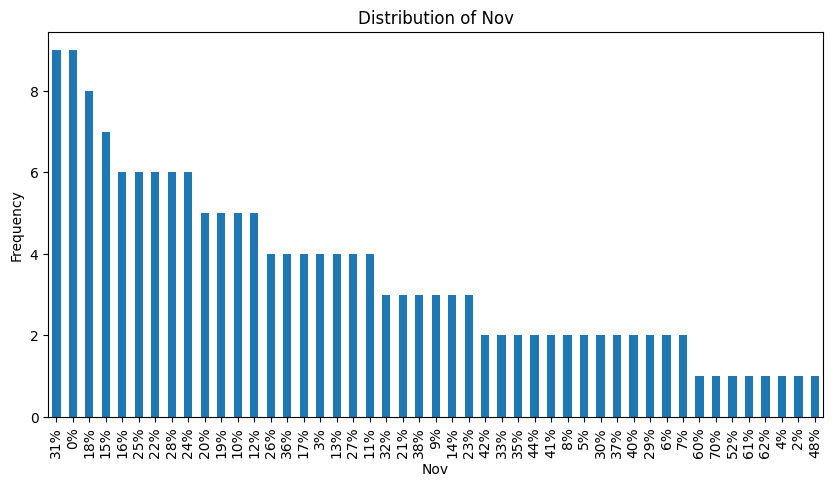

In [12]:
plt.figure(figsize=(10, 5))

df['Nov'].value_counts().plot(kind='bar')

plt.xlabel("Nov")
plt.ylabel("Frequency")
plt.title("Distribution of Nov")

plt.show()


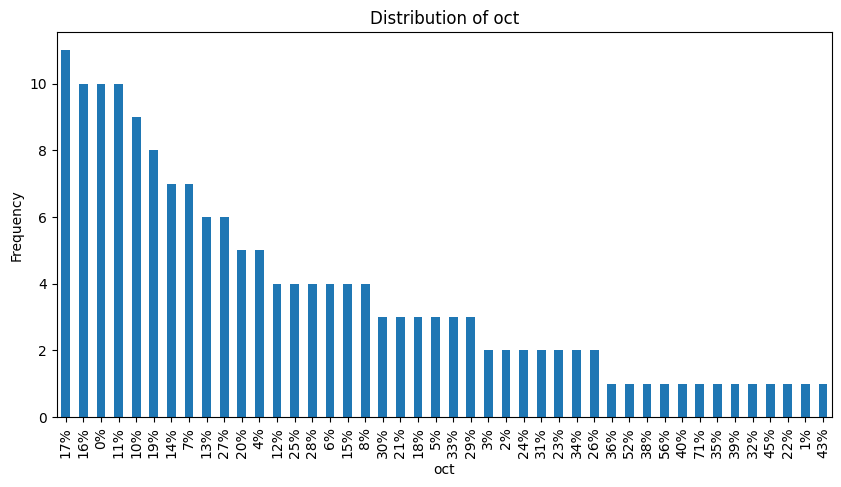

In [13]:
plt.figure(figsize=(10, 5))

df['Oct'].value_counts().plot(kind='bar')

plt.xlabel("oct")
plt.ylabel("Frequency")
plt.title("Distribution of oct")

plt.show()


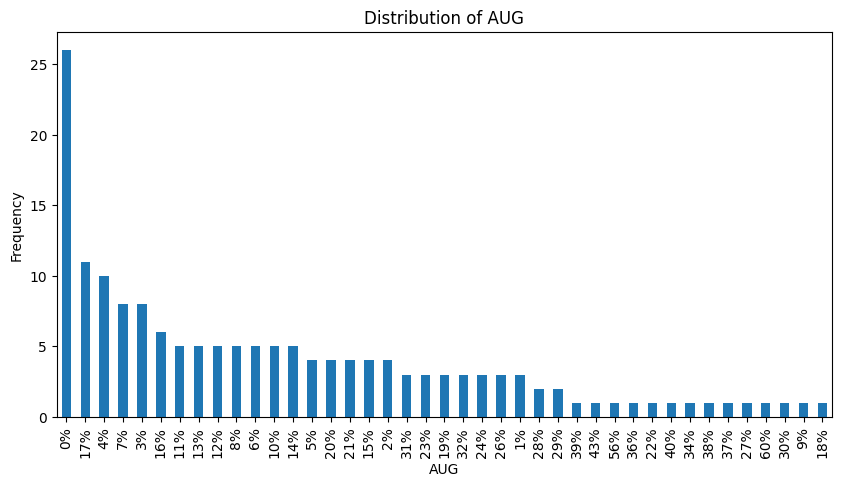

In [14]:
plt.figure(figsize=(10, 5))

df['Aug'].value_counts().plot(kind='bar')

plt.xlabel("AUG")
plt.ylabel("Frequency")
plt.title("Distribution of AUG")

plt.show()


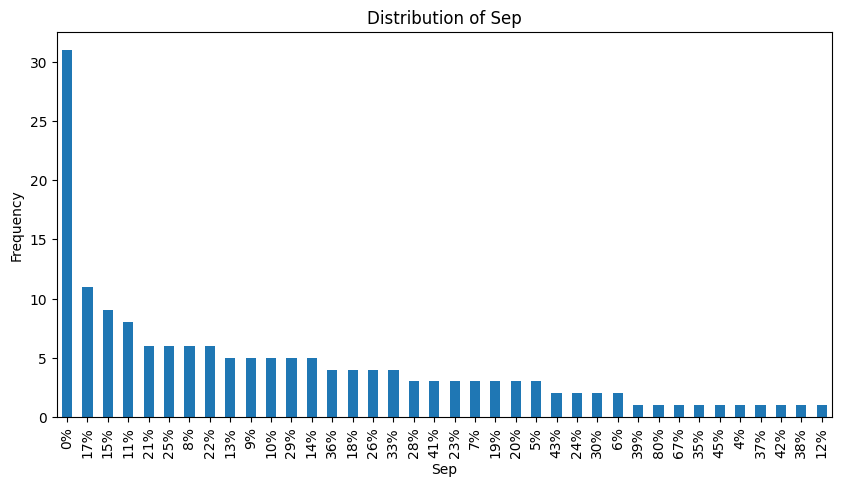

In [15]:
plt.figure(figsize=(10, 5))

df['Sep'].value_counts().plot(kind='bar')

plt.xlabel("Sep")
plt.ylabel("Frequency")
plt.title("Distribution of Sep")

plt.show()


<Axes: xlabel='Sep', ylabel='Nov'>

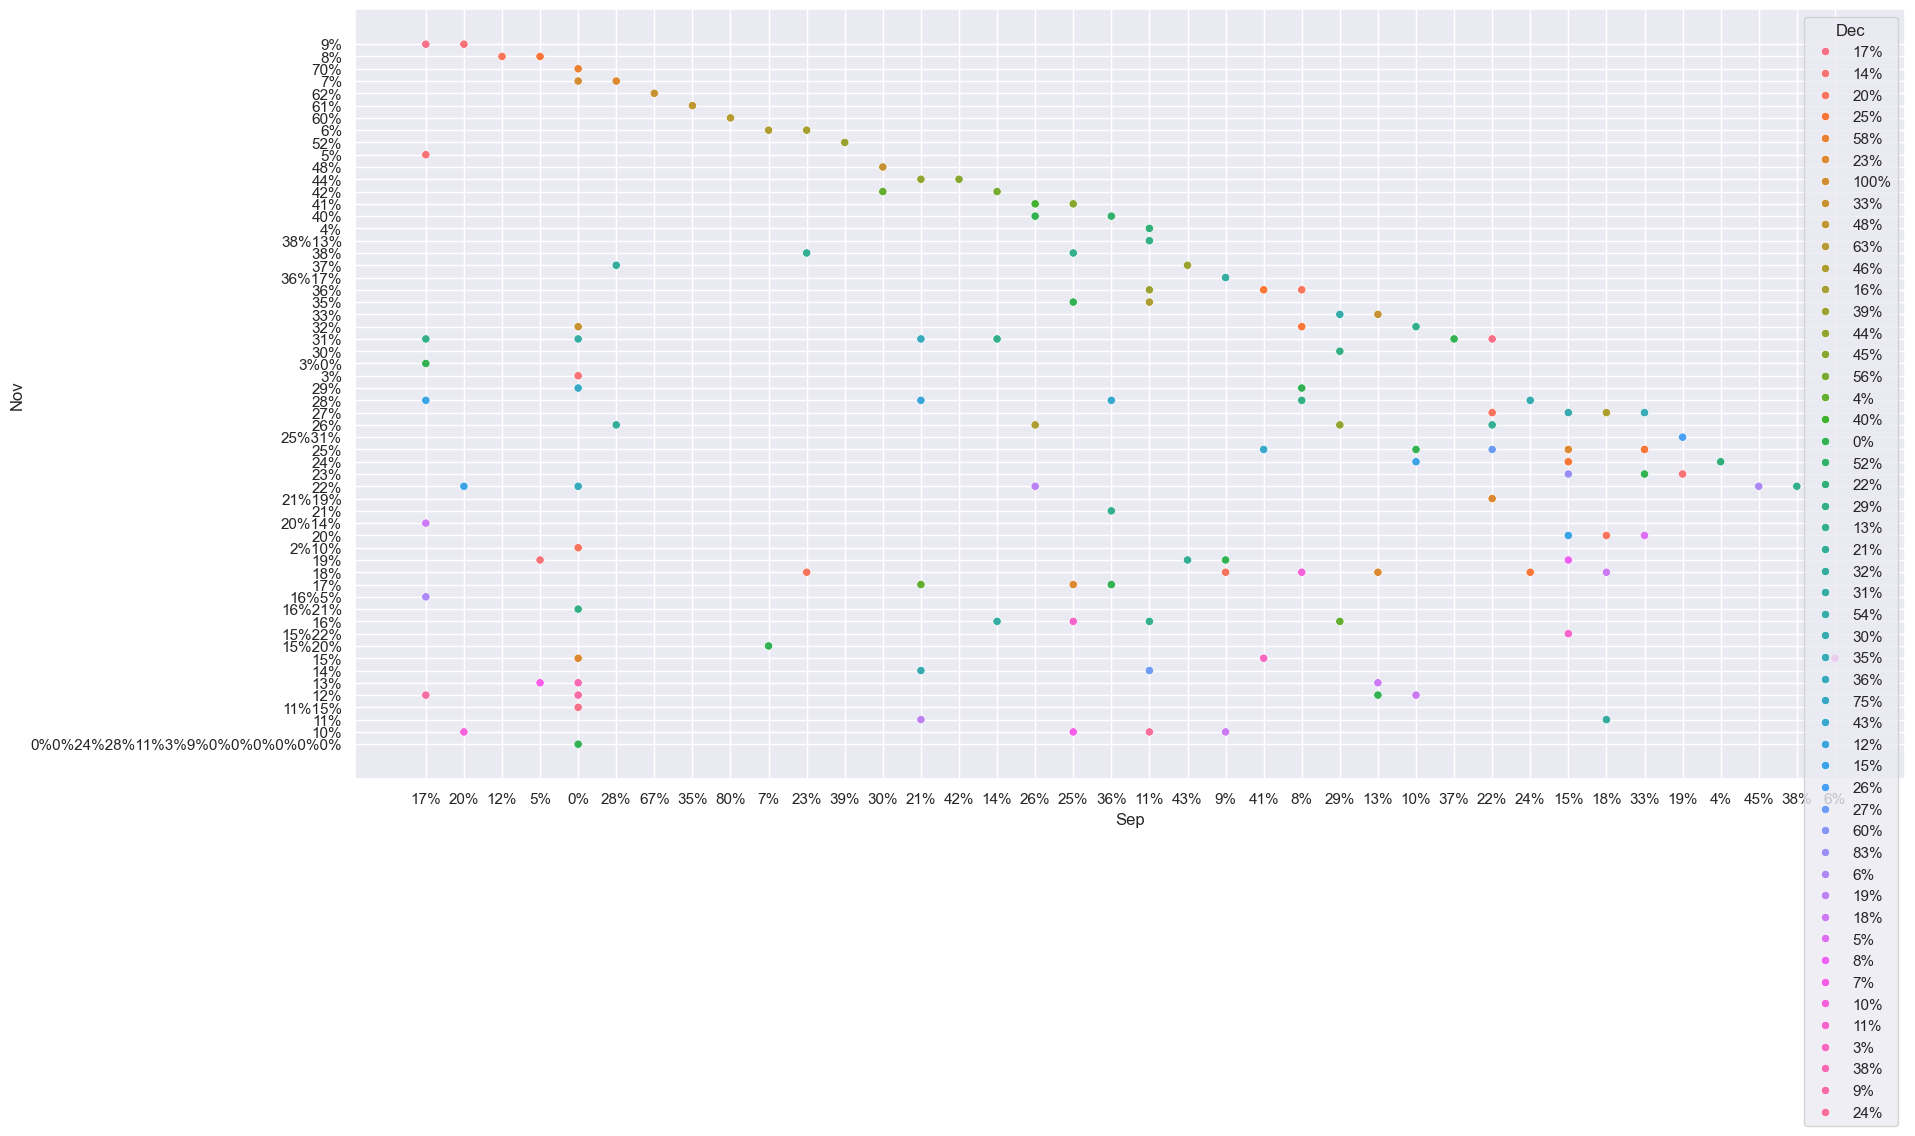

In [16]:
sales_state = df.groupby(['Sep', 'Dec'], as_index=False)['Nov'].sum().sort_values(by='Nov', ascending=False)

sns.set(rc={'figure.figsize':(20,10)})
sns.scatterplot(data = sales_state, x = 'Sep',y= 'Nov', hue='Dec')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      163 non-null    object
 1   Store_Name  163 non-null    object
 2   Dec         163 non-null    object
 3   Nov         163 non-null    object
 4   Oct         163 non-null    object
 5   Sep         163 non-null    object
 6   Aug         163 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB


In [18]:
overall_avg = df.select_dtypes(include='number').mean().mean()
print("Overall Average Attach %:", round(overall_avg, 2))


Overall Average Attach %: nan


In [19]:
jan_predictions = []

In [20]:
for i, row in df.iterrows():
     months = ['Aug','Sep','Oct','Nov','Dec']
     y = row[months].values
     if len(y) != 5:   # Ensure 5 months exist
        jan_predictions.append(np.nan)
        continue

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      163 non-null    object
 1   Store_Name  163 non-null    object
 2   Dec         163 non-null    object
 3   Nov         163 non-null    object
 4   Oct         163 non-null    object
 5   Sep         163 non-null    object
 6   Aug         163 non-null    object
dtypes: object(7)
memory usage: 9.0+ KB


In [22]:
x = pd.DataFrame({'feature':[1,2,3,4,5]})
y = pd.Series([10, 30, 50, 40,20])
mask = ~y.isna()
x_clean = x[mask]
y_clean = y[mask]
print(x_clean)
print(y_clean)

   feature
0        1
1        2
2        3
3        4
4        5
0    10
1    30
2    50
3    40
4    20
dtype: int64


In [23]:
y_filled = y.fillna(0)
y_filled = y.fillna(y.mean())

In [24]:
np.isnan(y).sum()

np.int64(0)

In [25]:
print("X shape:", x.shape)
print("y shape:", y.shape)
print("Total NaN in y:", np.isnan(y).sum())


X shape: (5, 1)
y shape: (5,)
Total NaN in y: 0


In [26]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(f"rows train: {len(train_set)}\n rows test: {len(test_set)}\n")

rows train: 130
 rows test: 33



In [28]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df, df['Branch']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]

In [29]:
df = strat_train_set.drop('Dec',axis=1)
df_labels = strat_train_set['Dec'].copy()

In [30]:
strat_train_set.describe()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
count,130,130,130,130,130,130,130
unique,6,130,47,44,40,34,38
top,Delhi_Ncr,Delhi(Shahdara) Br,0%,0%,17%,0%,0%
freq,35,1,19,8,10,25,21


In [31]:
strat_train_set.shape

(130, 7)

In [32]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 22 to 136
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Branch      33 non-null     object
 1   Store_Name  33 non-null     object
 2   Dec         33 non-null     object
 3   Nov         33 non-null     object
 4   Oct         33 non-null     object
 5   Sep         33 non-null     object
 6   Aug         33 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [33]:
strat_test_set['Dec'].value_counts()

Dec
0%     7
23%    2
20%    2
14%    2
46%    2
10%    1
24%    1
13%    1
39%    1
9%     1
25%    1
43%    1
6%     1
30%    1
29%    1
32%    1
48%    1
18%    1
3%     1
22%    1
45%    1
7%     1
35%    1
Name: count, dtype: int64

In [34]:
df.shape

(130, 6)

In [35]:
df.head(10)

,Branch,Store_Name,Nov,Oct,Sep,Aug
63,Delhi_Ncr,Delhi(Shahdara) Br,25%,39%,33%,38%
150,Telangana,Ts(Hayathnagar),11%,7%,0%,7%
91,Delhi_Ncr,Delhi(Narela),29%,43%,0%,32%
43,Gujarat,Ahmedabad(Dev Arc) Br,18%,14%,24%,20%
111,Telangana,Ts(Kompally- Golden Plaza),32%,14%,10%,0%
8,Delhi_Ncr,Up (Noida Sec.18) Br,22%,21%,26%,21%
34,Delhi_Ncr,Haryana(Faridabad) Br,25%,33%,15%,8%
38,Delhi_Ncr,Delhi(Paschim Vihar),27%,30%,33%,34%
65,Gujarat,Ahmedabad(Odhav) Br,6%,17%,7%,10%
116,Delhi_Ncr,Haryana(M G Road) Br,7%,16%,0%,3%


In [36]:
df = strat_train_set.copy()

In [37]:
df = strat_test_set.copy()

In [38]:
 strat_train_set.shape

(130, 7)

<Axes: xlabel='Dec', ylabel='Nov'>

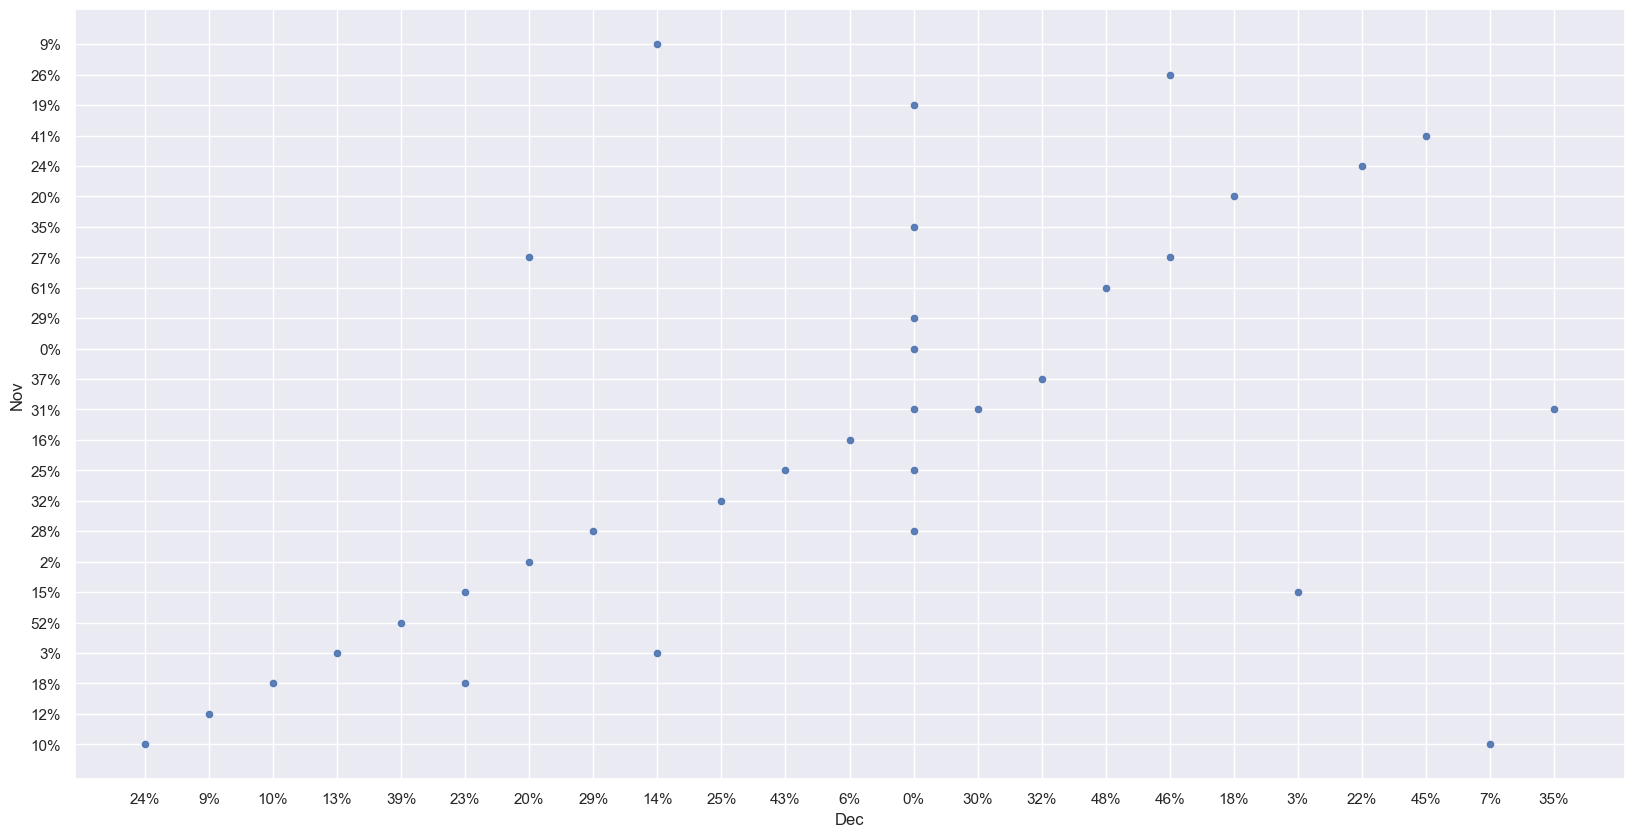

In [39]:
df.plot(kind="scatter",x="Dec",y="Nov",alpha=0.9)

In [40]:
df.head()

,Branch,Store_Name,Dec,Nov,Oct,Sep,Aug
22,Thane,Virar Br,24%,10%,16%,11%,6%
135,Gujarat,Ahmedabad(Vishala) Br,9%,12%,16%,17%,8%
82,Telangana,Ts(Karmanghat),10%,18%,16%,8%,11%
51,Telangana,Ts(Warangal),13%,3%,4%,0%,0%
17,Delhi_Ncr,Delhi(Daryaganj),39%,52%,31%,39%,32%


<Axes: xlabel='Branch', ylabel='Store_Name'>

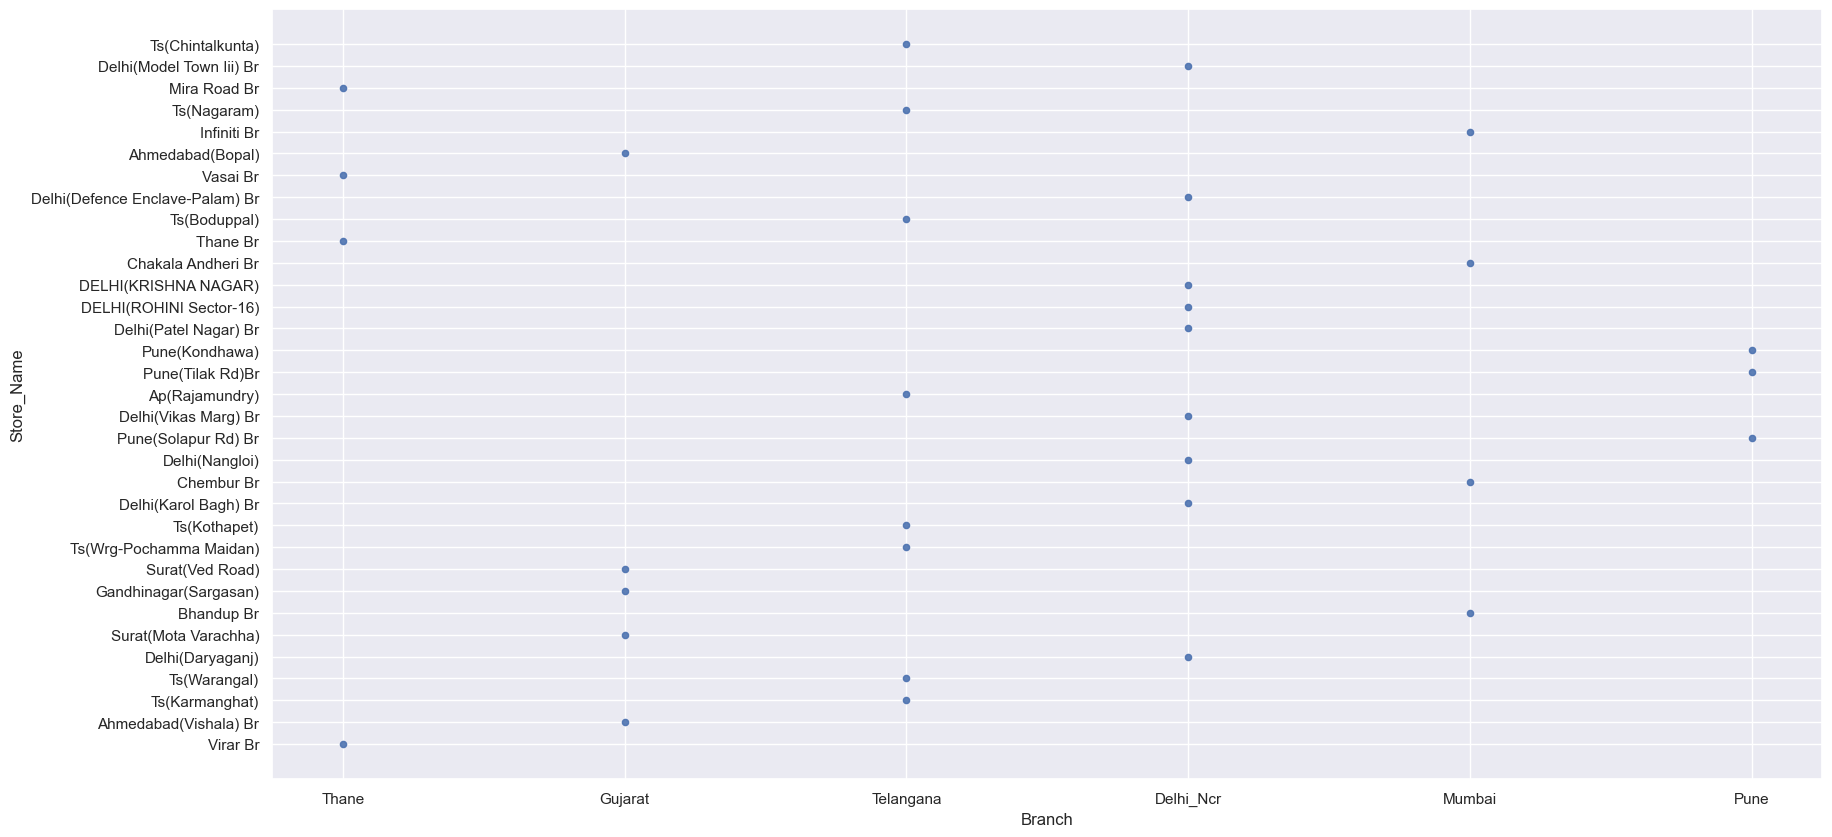

In [41]:
df.plot(kind="scatter", x="Branch", y="Store_Name", alpha=0.9)

In [42]:
df2 = strat_train_set.drop('Dec',axis=1)
df_labels = strat_train_set['Dec'].copy()

In [43]:
print(df_labels.shape) 

(130,)


In [44]:
df.shape
print(len(df))
print(len(df_labels))

33
130


In [45]:
model = LinearRegression()
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
df.columns = df.columns.str.strip()

In [47]:
months = ['Aug','Sep','Oct','Nov','Dec']
for col in months:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('%', '', regex=False)
        .replace('nan', np.nan)
        .astype(float)
)

In [48]:
df[months].info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 22 to 136
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Aug     33 non-null     float64
 1   Sep     33 non-null     float64
 2   Oct     33 non-null     float64
 3   Nov     33 non-null     float64
 4   Dec     33 non-null     float64
dtypes: float64(5)
memory usage: 1.5 KB


In [49]:
df[months].dtypes


Aug    float64
Sep    float64
Oct    float64
Nov    float64
Dec    float64
dtype: object

In [50]:
X = df[['Aug','Sep','Oct','Nov']]
y = df['Dec']

print(X.head())
print(X.shape)

      Aug   Sep   Oct   Nov
22    6.0  11.0  16.0  10.0
135   8.0  17.0  16.0  12.0
82   11.0   8.0  16.0  18.0
51    0.0   0.0   4.0   3.0
17   32.0  39.0  31.0  52.0
(33, 4)


In [51]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
X = df[['Aug', 'Sep', 'Oct', 'Nov']]
y = df[['Dec']]


In [53]:
y.describe() 

,Dec
count,33.000000
mean,19.515152
std,15.866870
min,0.000000
25%,6.000000
50%,20.000000
75%,30.000000
max,48.000000


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [55]:
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('model', LinearRegression())
])

In [56]:
print(X.columns)
print(y.columns)


Index(['Aug', 'Sep', 'Oct', 'Nov'], dtype='object')
Index(['Dec'], dtype='object')


In [57]:
df.info

<bound method DataFrame.info of         Branch                       Store_Name   Dec   Nov   Oct   Sep   Aug
22       Thane                         Virar Br  24.0  10.0  16.0  11.0   6.0
135    Gujarat            Ahmedabad(Vishala) Br   9.0  12.0  16.0  17.0   8.0
82   Telangana                   Ts(Karmanghat)  10.0  18.0  16.0   8.0  11.0
51   Telangana                     Ts(Warangal)  13.0   3.0   4.0   0.0   0.0
17   Delhi_Ncr                 Delhi(Daryaganj)  39.0  52.0  31.0  39.0  32.0
86     Gujarat             Surat(Mota Varachha)  23.0  15.0  14.0   0.0   9.0
75      Mumbai                       Bhandup Br  23.0  18.0  11.0  13.0  11.0
101    Gujarat            Gandhinagar(Sargasan)  20.0   2.0   1.0   0.0   3.0
41     Gujarat                  Surat(Ved Road)  29.0  28.0  13.0   8.0   8.0
142  Telangana          Ts(Wrg-Pochamma Maidan)  14.0   3.0   4.0   0.0   0.0
66   Telangana                     Ts(Kothapet)  25.0  32.0  20.0   8.0  15.0
28   Delhi_Ncr             Delhi

In [58]:
pipeline.fit(X_train, y_train)


,steps,"[('imputer', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,fit_intercept,True


In [59]:
df['Jan_Prediction_ML'] = pipeline.predict(
    df[['Aug', 'Sep', 'Oct', 'Nov']]
).clip(0, 100)


In [60]:
some_data= df[:4]

In [61]:
some_labels = df_labels[:4]

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler()),
])

In [63]:
my_pipeline.fit(y)
prepared_data = my_pipeline.transform(y)


In [64]:
model.predict(prepared_data)

C:\Users\Shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.86111219, 18.98104101, 19.17304576, 19.74905999, 24.74118336,
       21.66910744, 21.66910744, 21.09309321, 22.82113591, 19.94106474,
       22.05311693, 25.50920234, 18.40502678, 17.25299831, 23.01314066,
       23.39715015, 17.25299831, 17.25299831, 26.46922607, 26.08521658,
       17.25299831, 17.25299831, 20.70908372, 17.82901254, 21.4771027 ,
       25.89321183, 18.59703152, 23.97316438, 17.25299831, 17.25299831,
       21.09309321, 26.08521658, 19.94106474])

In [65]:
list(some_data)

['Branch',
 'Store_Name',
 'Dec',
 'Nov',
 'Oct',
 'Sep',
 'Aug',
 'Jan_Prediction_ML']

In [66]:
y.mean(), y.min(), y.max()
x.mean(), x.min(), x.max()

(feature    3.0
 dtype: float64,
 feature    1
 dtype: int64,
 feature    5
 dtype: int64)

In [67]:
y.describe()

,Dec
count,33.000000
mean,19.515152
std,15.866870
min,0.000000
25%,6.000000
50%,20.000000
75%,30.000000
max,48.000000


In [68]:
jan_pred = model.predict([[5]])[0]
jan_predictions.append(round(jan_pred, 0))

C:\Users\Shiva\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [69]:
df['Jan_Predictions'] = (
    pipeline
    .predict(df[['Aug', 'Sep', 'Oct', 'Nov']])
    .round(0)
    .clip(0)
    .astype(int)
)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 22 to 136
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Branch             33 non-null     object 
 1   Store_Name         33 non-null     object 
 2   Dec                33 non-null     float64
 3   Nov                33 non-null     float64
 4   Oct                33 non-null     float64
 5   Sep                33 non-null     float64
 6   Aug                33 non-null     float64
 7   Jan_Prediction_ML  33 non-null     float64
 8   Jan_Predictions    33 non-null     int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 2.6+ KB


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse


(10.555836757556474, np.float64(12.20184886196913))

In [72]:
X.columns

Index(['Aug', 'Sep', 'Oct', 'Nov'], dtype='object')

In [73]:
df[['Aug','Sep','Oct','Nov','Dec']].corr()


,Aug,Sep,Oct,Nov,Dec
Aug,1.000000,0.595207,0.761739,0.627231,0.602237
Sep,0.595207,1.000000,0.723901,0.542818,0.328432
Oct,0.761739,0.723901,1.000000,0.790345,0.555612
Nov,0.627231,0.542818,0.790345,1.000000,0.497148
Dec,0.602237,0.328432,0.555612,0.497148,1.000000


In [74]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, y,y, scoring="neg_mean_squared_error", cv=10)
rmse_scores = (-scores) 

In [75]:
rmse_scores

array([4.73316543e-30, 0.00000000e+00, 6.31088724e-30, 3.05026217e-29,
       8.41451632e-30, 0.00000000e+00, 7.42844019e-30, 2.36658272e-30,
       8.41451632e-30, 0.00000000e+00])

In [76]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:", scores.mean())
    print("Standard deviation:",scores.std())

In [77]:
print_scores(rmse_scores)

Scores: [4.73316543e-30 0.00000000e+00 6.31088724e-30 3.05026217e-29
 8.41451632e-30 0.00000000e+00 7.42844019e-30 2.36658272e-30
 8.41451632e-30 0.00000000e+00]
Mean: 6.817072989284911e-30
Standard deviation: 8.545793393933315e-30
